In [84]:
import numpy as np
import matplotlib.pyplot as plt
import random

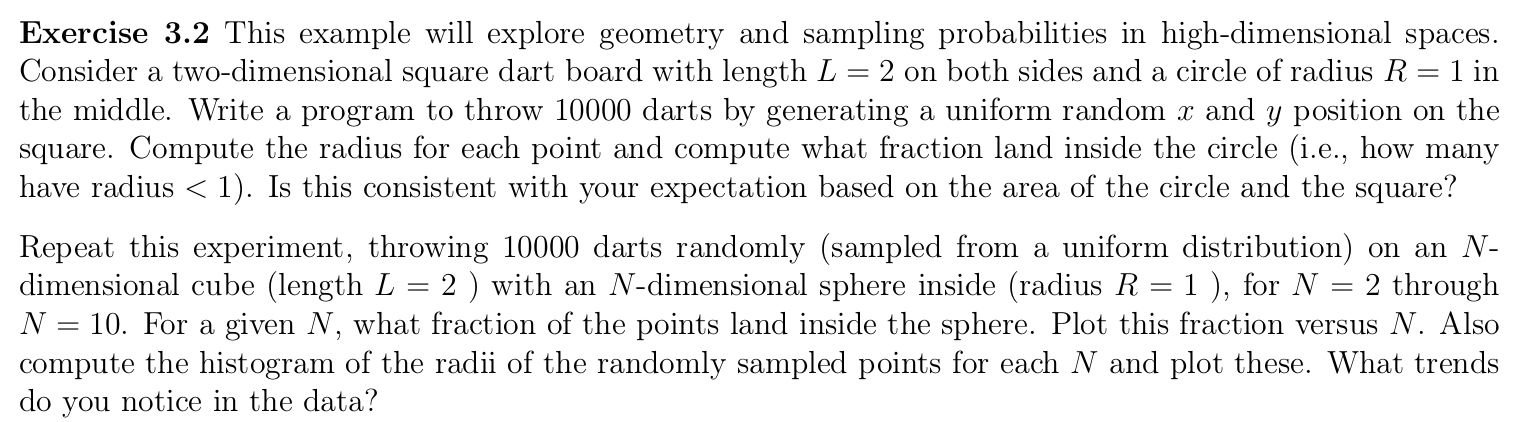

In [4]:
#global variables L -length of board, R -radius
L = 2
R = 1

In [19]:
t = np.linspace(0, 2*np.pi, 100)

In [5]:
X = np.random.uniform(0, 2, 10000)
Y = np.random.uniform(0, 2, 10000)

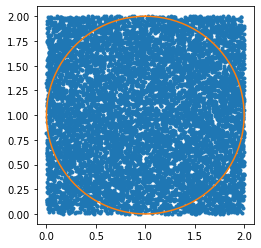

In [21]:
plt.plot(X, Y, ".")
plt.plot(np.sin(t)+1, np.cos(t)+1)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

In [31]:
R = np.square(X-1) + np.square(Y-1)
in_circle = np.count_nonzero(R <= 1)
print("Ratio of points inside the cirle", in_circle/10000)
print("Ratio of area of circle to square", np.pi/4)
print("It is consistent with expectation based on probability computed using areas")

Ratio of points inside the cirle 0.7818
Ratio of area of circle to square 0.7853981633974483
It is consistent with expectation based on probability computed using areas


### N-dimensional case

In [42]:
N = 2 #number of dimensions

In [46]:
X = np.random.uniform(0, 2, (N,10000))

In [44]:
#compute radii
R = np.square(X[0]-1)
for i in range(N-1):
    R = R + np.square(X[i+1]-1)

In [45]:
in_circle = np.count_nonzero(R <= 1)
print("Ratio of points inside the cirle", in_circle/10000)

Ratio of points inside the cirle 0.7873


In [58]:
def in_circle_fraction(N):
    X = np.random.uniform(0, 2, (N,10000))
    R = np.square(X[0]-1)
    for i in range(N-1):
        R = R + np.square(X[i+1]-1)
    in_circle = np.count_nonzero(R <= 1)
    return in_circle/10000, R

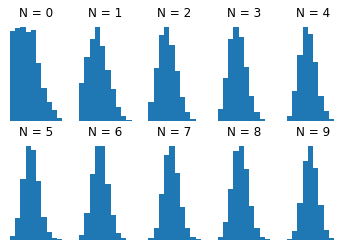

In [72]:
ratios = np.zeros(10)
Ns = np.zeros(10)
fig, axs = plt.subplots(2,5)
for i in range(10):
    ratios[i], R = in_circle_fraction(i+2)
    axs[int(i/5), i%5].hist(R)
    axs[int(i/5), i%5].set_title('N = '+ str(i))
    axs[int(i/5), i%5].axis('off')
    Ns[i] = i+2

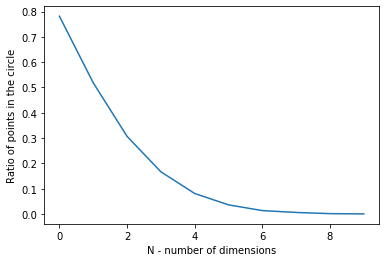

In [57]:
plt.plot(ratios)
plt.xlabel("N - number of dimensions")
plt.ylabel("Ratio of points in the circle")
plt.show()

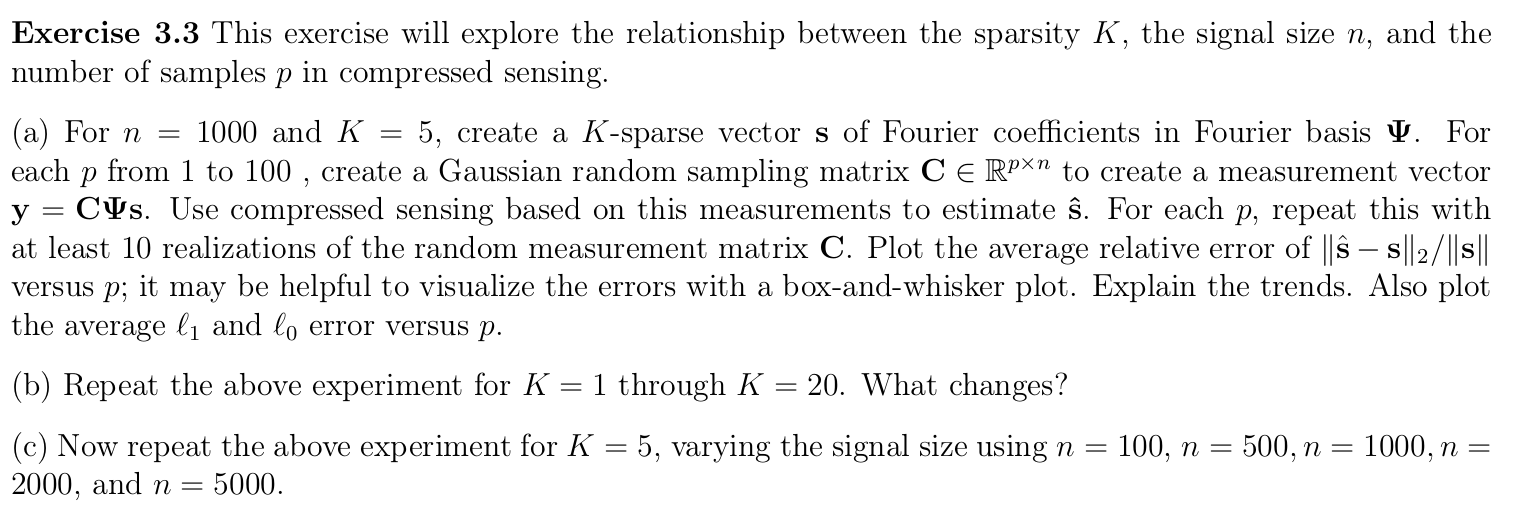

In [91]:
n = 1000
K = 5
s = np.zeros(1000)
ind = random.sample(range(0, 1000), K)
for i in ind:
    s[i] = np.random.randn()

In [104]:
from scipy.linalg import dft
from scipy.optimize import minimize
PSI = dft(n)
def L1_norm(x):
    return np.linalg.norm(x,ord=1)

In [106]:
#for p in range(1,101):
p = 5
C = np.random.randn(p,n)
Theta = C @ PSI
y = C @ PSI @ s
constr = ({'type': 'eq', 'fun': lambda x:  Theta @ x - y})
x0 = np.linalg.pinv(Theta) @ y # initialize with L2 solution
res = minimize(L1_norm, x0, method='SLSQP',constraints=constr)
s_L1 = res.x


/home/yerbol/.local/lib/python3.8/site-packages/numpy/lib/type_check.py:114: ComplexWarning: Casting complex values to real discards the imaginary part
  return asarray(a, dtype=dtype)
/home/yerbol/.local/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:598: ComplexWarning: Casting complex values to real discards the imaginary part
  J_transposed[i] = df / dx
/home/yerbol/.local/lib/python3.8/site-packages/scipy/optimize/_slsqp_py.py:422: ComplexWarning: Casting complex values to real discards the imaginary part
  slsqp(m, meq, x, xl, xu, fx, c, g, a, acc, majiter, mode, w, jw,


In [107]:
s_L1

array([-7.18744357e-06,  2.79671630e-04, -1.00957064e-05, -6.17081773e-03,
       -1.64572300e-05,  1.97244389e-05,  1.16126618e-04,  2.74250903e-03,
       -1.31415336e-05, -3.38905648e-04, -9.79167241e-06, -3.63077538e-07,
       -1.09862594e-04,  6.21328104e-06, -3.22373661e-05,  2.42976855e-05,
        3.85097793e-05, -1.12294132e-05, -8.83144232e-06,  4.87530321e-06,
       -4.99236532e-05,  1.19355676e-04,  6.89001008e-05,  1.12358173e-05,
        3.80893183e-06, -4.64373014e-06,  4.36217853e-06, -1.18080241e-04,
       -1.58404079e-05, -2.38695124e-02, -8.85432836e-03, -7.49052392e-06,
        1.25611516e-06,  1.62548880e-02, -1.02462736e-05,  1.47154533e-05,
       -3.85188764e-05,  1.64886816e-05,  2.41507821e-02, -1.31180311e-03,
       -4.26624575e-03,  1.93833265e-05, -8.68999664e-06,  5.25879457e-06,
       -8.76141310e-05,  1.51911723e-05,  1.70272007e-05, -3.61141742e-06,
       -1.19855710e-05,  7.57127505e-07, -4.88541073e-06, -2.60269863e-03,
        1.24826568e-05,  